# Convolution

$
\newcommand{\pdv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ipdv}[2]{\partial #1/\partial #2}
\newcommand{\dd}[1]{\,\textit{d}#1\,}
\newcommand{\softmax}[1]{\Softmax\left(#1\right)}
\newcommand{\smax}[1]{\Smax\left(#1\right)}
\newcommand{\exp}[1]{e^{#1}}
\newcommand{\grad}{\nabla}
\newcommand{\R}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\idm}{\mathbb{1}}  % \idm identity matrix
\newcommand{\mean}[1]{\left\langle #1 \right\rangle}
\DeclareMathOperator{\Softmax}{softmax}
\DeclareMathOperator{\expval}{\mathbb{E}}
\DeclareMathOperator{\Smax}{smax}
\DeclareMathOperator{\relu}{ReLU}
\DeclareMathOperator{\mat}{Mat}
\DeclareMathOperator{\GL}{GL}
\DeclareMathOperator{\SL}{SL}
\DeclareMathOperator{\diag}{diag}
\DeclareMathOperator{\sgn}{sgn}
\DeclareMathOperator{\lexp}{exp}
$

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Padding" data-toc-modified-id="Padding-1">Padding</a></span></li></ul></div>

In [1]:
import tensorflow as tf
from tensorflow import initializers

## Padding

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    pad_size = ((0,0),(pad,pad),(pad,pad),(0,0))
    
    padded_X = np.pad(X, pad_size, 'constant')
    
    return padded_X

In [53]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)
    
    weights_initer = tf.initializers.random_normal(0,1)
    
    bias_initer =tf.constant(0., shape=[200], dtype=tf.float32)

    W1 = tf.get_variable("W1", [1,100000], initializer = weights_initer)
    W2 = tf.get_variable("W2", [1,100000], initializer = weights_initer)

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [50]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    a = sess_test.run(parameters)
#     print("W1 = " + str(parameters["W1"].eval()))
#     print("W2 = " + str(parameters["W2"].eval()))

In [51]:
a['W2'] = (a['W2']*2) + 3

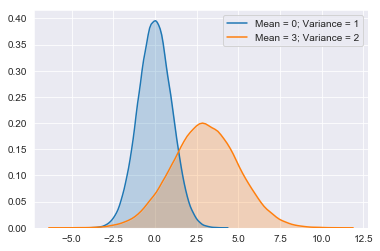

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

sns.distplot(a['W1'], 
             hist=False, 
             kde_kws={'shade':True, "label": "Mean = {}; Variance = {}".format(0,1)})

sns.distplot(a['W2'], 
             hist=False, 
             kde_kws={'shade':True, "label": "Mean = {}; Variance = {}".format(3, 2)})

plt.show()